In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from LyaPlotter.file_types import FilesBase

In [3]:
x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_N_clustering.dat.fits')

In [10]:
data_full.file_paths

['/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_N_clustering.dat.fits']

In [18]:
data_full = FilesBase('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_clustering.dat.fits')
data_S = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_S_clustering.dat.fits')
data_N = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_N_clustering.dat.fits')

In [25]:
assert np.all(np.in1d(data_S.z, data_full.z))
assert np.all(np.in1d(data_N.z, data_full.z))
assert data_full.N_obj == data_N.N_obj + data_S.N_obj

In [26]:
ran_full = FilesBase(Path(data_full.file_paths[0]).parent / 'QSO_0_clustering.ran.fits')

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.

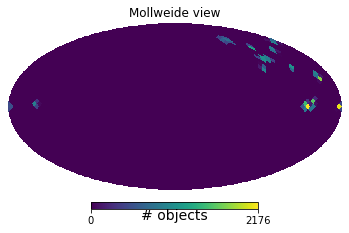

In [29]:
data_full.plot_footprint()

In [31]:
ran_full.N_obj

425027

In [32]:
data_full.N_obj

36113

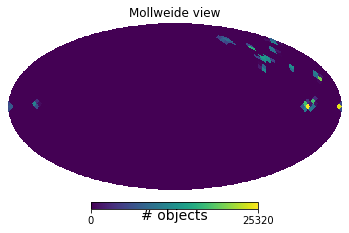

In [30]:
ran_full.plot_footprint()

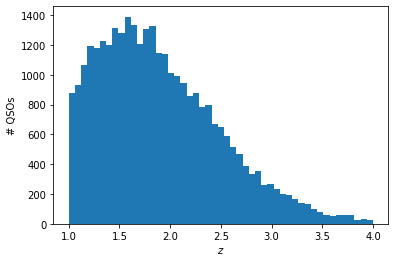

In [28]:
data_full.plot_dist()

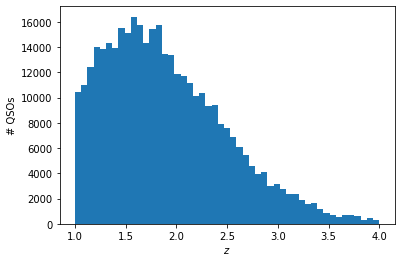

In [27]:
ran_full.plot_dist()

In [11]:
mask = data.z > 0.8
mask &= data.z < 0.9

In [12]:
mask.sum()

1077

In [13]:
data.RA

array([219.57870749, 219.61870731, 219.64603426, ..., 270.4707523 ,
       270.58977224, 270.59159899])

In [14]:
data.DEC

array([-2.39633835, -2.38662739, -2.41286189, ..., 67.74296101,
       67.79290357, 67.65277501])

Data file can be read by my scripts out of the box.

In [ ]:
rand = FilesBase(QSO